In [13]:
import dataio

In [2]:
table =  dataio.n_rows_parquet("./movies-3k.parquet", 15)

In [3]:
df = table.to_pandas()
df.sort_values(by=['IMDB_Rating'])[["IMDB_Rating", "Rotten_Tomatoes_Rating"]]

,IMDB_Rating,Rotten_Tomatoes_Rating
4,3.4,62.0
7,3.8,NaN
8,5.8,25.0
0,6.1,NaN
2,6.8,NaN
14,6.8,87.0
1,6.9,NaN
9,7.0,86.0
10,7.0,81.0
11,7.5,84.0


<Axes: >

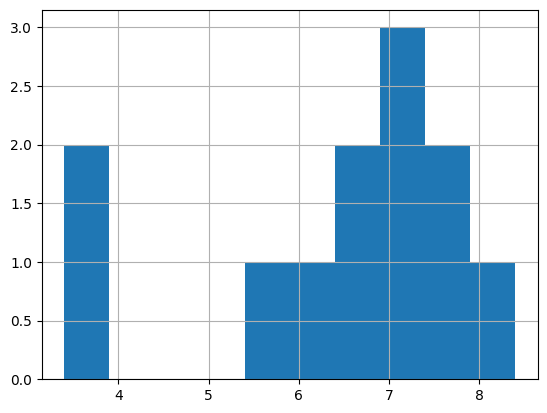

In [5]:
# why is it that between 6-7 IMDB rating, the rotten tomatoes for 0s goes higher than total?
# I suspect a weird bug with counting Null values
df[df["IMDB_Rating"].notna()]["IMDB_Rating"].hist()

In [6]:
table =  dataio.n_rows_parquet("./movies-3k.parquet", 3201)

In [7]:
df = table.to_pandas()

In [8]:
limited = df[df["IMDB_Rating"].notna() & df["Rotten_Tomatoes_Rating"].notna()][:15]

array([[<Axes: title={'center': 'IMDB_Rating'}>,
        <Axes: title={'center': 'Rotten_Tomatoes_Rating'}>]], dtype=object)

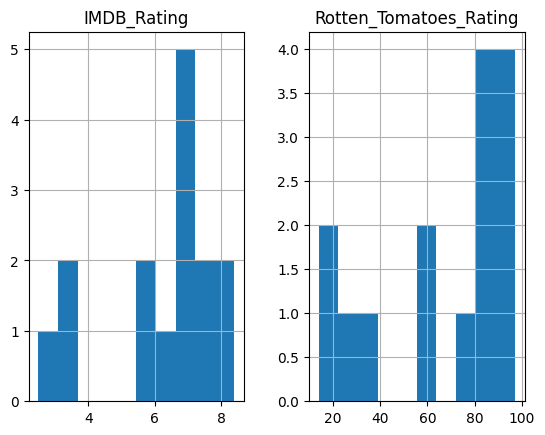

In [9]:
limited[["IMDB_Rating", "Rotten_Tomatoes_Rating"]].hist()

In [13]:
import pyarrow as pa
table = pa.Table.from_pandas(limited)

In [14]:
dataio.table_to_arrow_file(table, "limited.arrow")
dataio.table_to_parquet_file(table, "limited.parquet")

In [10]:
limited.to_csv("limited.csv", index=False)

In [14]:
table =  dataio.n_rows_parquet("./movies-3k.parquet", 3201).to_pandas()

In [15]:
table["MPAA_Rating"].value_counts()

R            1194
PG-13         865
PG            354
Not Rated      94
G              79
NC-17           8
Open            2
Name: MPAA_Rating, dtype: int64

In [32]:
def filter_between(table, column_name, a, b):
    return table[(table[column_name] >= a) & (table[column_name] <= b)]
filtered = filter_between(table, "IMDB_Rating", 6.41, 8.52)
filtered = filter_between(filtered, "Rotten_Tomatoes_Rating", 0, 5)

In [33]:
filtered["Rotten_Tomatoes_Rating"]

Series([], Name: Rotten_Tomatoes_Rating, dtype: float64)